<font face="微软雅黑" size=5> 2 Data Understanding

<font face="微软雅黑" size=3> 2.1 Load data and define data types

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as mn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('autos.csv',encoding='latin_1') 

df.head() # Show the name of each column 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [2]:
df.info() # Based information about each column type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [3]:
df.describe() 

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


<font face="微软雅黑" size=3> 2.2 Data attributes defination

In [4]:
# Data description Table
description_table = pd.DataFrame()
description_table['Features'] = df.columns
description_table['Description'] = ['When this ad was first crawled','Name of the car','private or dealer','OfferType of the car','The price of a car','abtest of the car','The types of vehicle',
                         'The year vehicle registrated', 'Which type of gearbox the car uses.',
                          'The horsepower the car has', 'The model of the car',
                          'How many kilometers the car run', ' at which month the car was first registered','Fuel type of the car',
                          'The brand of the car', 'Whether the car has unrepaired damage',' the date for which the ad at ebay was created','number of pictures in the ad ',
                          'The postal code of place the car registered','when the crawler saw this ad last online']
description_table['Attributes'] = ['ratio'] + ['norminal']*3+['ratio']+['norminal'] * 4 + ['ratio', 'norminal', 'ratio'] + ['norminal'] * 8 

description_table

,Features,Description,Attributes
0,dateCrawled,When this ad was first crawled,ratio
1,name,Name of the car,norminal
2,seller,private or dealer,norminal
3,offerType,OfferType of the car,norminal
4,price,The price of a car,ratio
5,abtest,abtest of the car,norminal
6,vehicleType,The types of vehicle,norminal
7,yearOfRegistration,The year vehicle registrated,norminal
8,gearbox,Which type of gearbox the car uses.,norminal
9,powerPS,The horsepower the car has,ratio


<font face="微软雅黑" size=3>2.3 Data Quality Verification

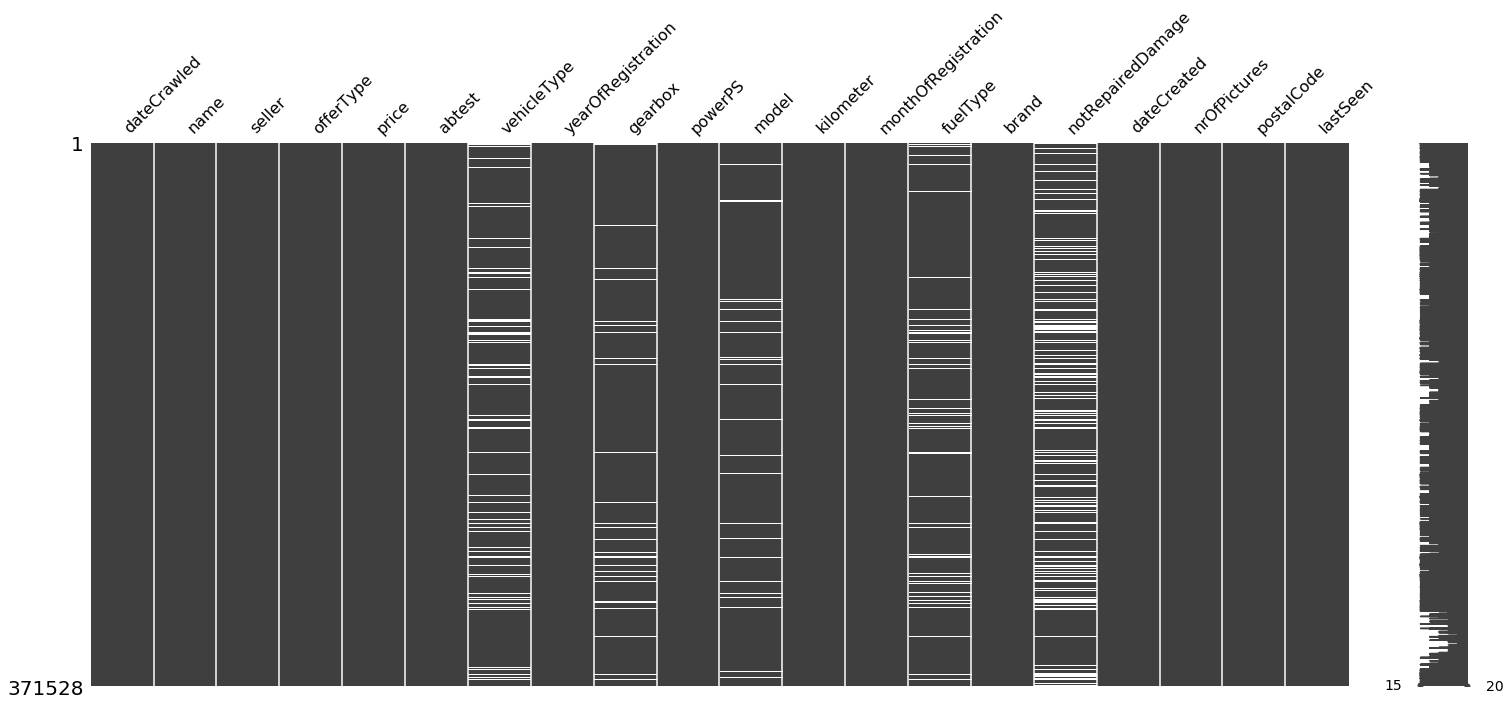

In [5]:
mn.matrix(df.sort_values(by=["name",]))

<font face="微软雅黑" size=3>In order to complete the cleaning process, we need to sum up the number of thr missing value under each column

In [6]:
print(df.isnull().sum())

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


<font face="微软雅黑" size=3>According to the results, we get some missing numbers for 'vehicleType','gearbox','model','fuelType','notRepairedDamage'. Then we need to cleaning these missing values for these features. What we need is to predict the price of used cars, we think 'vehicleType','gearbox','model','fuelType' are the most associated with 'price', and those missing data for our view, we think they are most likely to be the loss of information, not mistakes, so we decide to drop these null values.

In [7]:
df_notnull = df[(df['vehicleType'].notnull()) & (df['gearbox'].notnull()) & (df['model'].notnull()) 
                     & (df['fuelType'].notnull())]
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299864 entries, 2 to 371527
Data columns (total 20 columns):
dateCrawled            299864 non-null object
name                   299864 non-null object
seller                 299864 non-null object
offerType              299864 non-null object
price                  299864 non-null int64
abtest                 299864 non-null object
vehicleType            299864 non-null object
yearOfRegistration     299864 non-null int64
gearbox                299864 non-null object
powerPS                299864 non-null int64
model                  299864 non-null object
kilometer              299864 non-null int64
monthOfRegistration    299864 non-null int64
fuelType               299864 non-null object
brand                  299864 non-null object
notRepairedDamage      260956 non-null object
dateCreated            299864 non-null object
nrOfPictures           299864 non-null int64
postalCode             299864 non-null int64
lastSeen              

<font face="微软雅黑" size=3>Now, besides feature:'notRepairedDamage', there is not any other missing data for other features.
Set the null field in notRepairedDamage to "not declare"

In [8]:
df_notnull['notRepairedDamage'].fillna(value='not declare', inplace=True)
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299864 entries, 2 to 371527
Data columns (total 20 columns):
dateCrawled            299864 non-null object
name                   299864 non-null object
seller                 299864 non-null object
offerType              299864 non-null object
price                  299864 non-null int64
abtest                 299864 non-null object
vehicleType            299864 non-null object
yearOfRegistration     299864 non-null int64
gearbox                299864 non-null object
powerPS                299864 non-null int64
model                  299864 non-null object
kilometer              299864 non-null int64
monthOfRegistration    299864 non-null int64
fuelType               299864 non-null object
brand                  299864 non-null object
notRepairedDamage      299864 non-null object
dateCreated            299864 non-null object
nrOfPictures           299864 non-null int64
postalCode             299864 non-null int64
lastSeen              

In [9]:
print(df_notnull.isnull().sum())

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64


<font face="微软雅黑" size=3>We find that there is no empty and missing data, then we think duplicate data here for used car is more likely be mistaken,because it is less possibe that the cars have all same features, so we decide to drop duplicate data.

In [10]:
df_dropduplicates = df_notnull.drop_duplicates(['dateCrawled',])
df_dropduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239081 entries, 2 to 371527
Data columns (total 20 columns):
dateCrawled            239081 non-null object
name                   239081 non-null object
seller                 239081 non-null object
offerType              239081 non-null object
price                  239081 non-null int64
abtest                 239081 non-null object
vehicleType            239081 non-null object
yearOfRegistration     239081 non-null int64
gearbox                239081 non-null object
powerPS                239081 non-null int64
model                  239081 non-null object
kilometer              239081 non-null int64
monthOfRegistration    239081 non-null int64
fuelType               239081 non-null object
brand                  239081 non-null object
notRepairedDamage      239081 non-null object
dateCreated            239081 non-null object
nrOfPictures           239081 non-null int64
postalCode             239081 non-null int64
lastSeen              

<font face="微软雅黑" size=3>No matter the null values or the duplicate data, we think these quality issues exist are because of the manual input error, so we optimized the data through methods showed above.

<font face="微软雅黑" size=3>########################################

<font face="微软雅黑" size=3>After drop duplicate data, we find some features are not very associated with price, so we decide to delete some features.There are few strange features and values, in order to cleaning the data, we are going to inspect several features to show why we remove them, and the other undesired columns are removed for same purpose

In [11]:
print(df_dropduplicates['nrOfPictures'].sum()) # From this we need to delete nr0fPictures
print('=======================================')
print(df_dropduplicates.groupby('seller').size()) # From this we need to delete seller
print('=======================================')
print(df_dropduplicates.groupby('offerType').size())
print('=======================================')
print(df_dropduplicates.groupby('abtest').size())
print('=======================================')


# drop these features showed above and few others which I don't need under same purpose
df_new = df_dropduplicates.drop(['dateCrawled', 'monthOfRegistration', 'dateCreated', 'lastSeen','seller','offerType','abtest','nrOfPictures'], 1)
df_new.info()



0
seller
gewerblich         3
privat        239078
dtype: int64
offerType
Angebot    239079
Gesuch          2
dtype: int64
abtest
control    114740
test       124341
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 239081 entries, 2 to 371527
Data columns (total 12 columns):
name                  239081 non-null object
price                 239081 non-null int64
vehicleType           239081 non-null object
yearOfRegistration    239081 non-null int64
gearbox               239081 non-null object
powerPS               239081 non-null int64
model                 239081 non-null object
kilometer             239081 non-null int64
fuelType              239081 non-null object
brand                 239081 non-null object
notRepairedDamage     239081 non-null object
postalCode            239081 non-null int64
dtypes: int64(5), object(7)
memory usage: 23.7+ MB


<font face="微软雅黑" size=3 > Since if the car is too old or too new, too cheap or too expensive, runed too few miles or too many miles,too few PS or too many PS has less comparison values, so we are going to remove these cars too. So we are going to analyze the care registerd between 1980 and 2017, kms between 5000kms  and 200000kms, SP between 50 and 500, and price between 500 -  150000

In [12]:
print("Too new: %d" % df_new.loc[df_dropduplicates.yearOfRegistration > 2017].count()['name'])
print("Too old: %d" % df_new.loc[df_dropduplicates.yearOfRegistration < 1980].count()['name'])
print("Too cheap: %d" % df_new.loc[df_dropduplicates.price < 500].count()['name'])
print("Too expensive: " , df_new.loc[df_dropduplicates.price > 150000].count()['name'])
print("Too few km: " , df_new.loc[df_dropduplicates.kilometer < 5000].count()['name'])
print("Too many km: " , df_new.loc[df_dropduplicates.kilometer > 200000].count()['name'])
print("Too few PS: " , df_new.loc[df_dropduplicates.powerPS < 50].count()['name'])
print("Too many PS: " , df_new.loc[df_dropduplicates.powerPS > 500].count()['name'])

Too new: 2
Too old: 1926
Too cheap: 15598
Too expensive:  91
Too few km:  0
Too many km:  0
Too few PS:  16489
Too many PS:  478


<font face="微软雅黑" size=5>clean useless data

<font face="微软雅黑" size=3>Due to the reasons and outputs showed above, we get the final clean data which shows like below, because name is the combine of brand and vechicleType, we already have them in the features, we decide to drop it as well.

In [13]:
df_clean = df_new[(df_new.yearOfRegistration < 2017) & (df_new.yearOfRegistration > 1980)
                             & (df_new.price > 500) & (df_new.price < 150000)
                            & (df_new.kilometer > 5000) & (df_new.kilometer < 200000)
                            & (df_new.powerPS > 50) & (df_new.powerPS < 500)]
df_clean = df_clean.drop(['name'], 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202112 entries, 2 to 371527
Data columns (total 11 columns):
price                 202112 non-null int64
vehicleType           202112 non-null object
yearOfRegistration    202112 non-null int64
gearbox               202112 non-null object
powerPS               202112 non-null int64
model                 202112 non-null object
kilometer             202112 non-null int64
fuelType              202112 non-null object
brand                 202112 non-null object
notRepairedDamage     202112 non-null object
postalCode            202112 non-null int64
dtypes: int64(5), object(6)
memory usage: 18.5+ MB


In [14]:
print("Fuel types: " , df_clean['fuelType'].unique())
print("Damages: " , df_clean['notRepairedDamage'].unique())
print("Vehicle types: " , df_clean['vehicleType'].unique())
print("Brands: " , df_clean['brand'].unique())
print("Gearbox: " , df_clean['gearbox'].unique())
print("Model: " , df_clean['model'].unique())

Fuel types:  ['diesel' 'benzin' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Damages:  ['not declare' 'nein' 'ja']
Vehicle types:  ['suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'coupe' 'andere']
Brands:  ['jeep' 'volkswagen' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda' 'nissan'
 'renault' 'mercedes_benz' 'honda' 'fiat' 'mini' 'smart' 'audi' 'subaru'
 'volvo' 'mitsubishi' 'opel' 'hyundai' 'alfa_romeo' 'seat' 'lancia'
 'porsche' 'citroen' 'toyota' 'kia' 'chevrolet' 'dacia' 'suzuki'
 'daihatsu' 'chrysler' 'jaguar' 'rover' 'saab' 'daewoo' 'land_rover'
 'lada' 'trabant']
Gearbox:  ['automatik' 'manuell']
Model:  ['grand' 'golf' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'twingo' 'a_klasse' 'scirocco' '5er' 'civic' 'punto' 'e_klasse'
 'andere' 'one' 'fortwo' 'clio' '1er' 'b_klasse' 'a8' 'jetta' 'c_klasse'
 'micra' 'vito' 'sprinter' 'escort' 'forester' 'xc_reihe' 'fiesta'
 'scenic' 'a1' 'focus' 'a4' 'tt' 'astra' 'a6' 'jazz' 'transporter' 'polo'
 'slk' '7er' 'combo' '80' '147'

In [15]:
df_clean.describe() 

,price,yearOfRegistration,powerPS,kilometer,postalCode
count,202112.000000,202112.000000,202112.000000,202112.000000,202112.000000
mean,6798.938945,2003.890739,131.608074,125118.869736,52050.907190
std,7793.699411,5.627366,58.612347,38346.301824,25765.953319
min,501.000000,1981.000000,51.000000,10000.000000,1067.000000
25%,1890.000000,2000.000000,90.000000,100000.000000,31582.000000
50%,4100.000000,2004.000000,120.000000,150000.000000,51147.000000
75%,8890.000000,2008.000000,160.000000,150000.000000,73035.000000
max,148000.000000,2016.000000,495.000000,150000.000000,99998.000000


In [16]:
df_clean.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
2,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,not declare,90480
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,91074
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,60437
5,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,33775
6,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein,67112


In [17]:
# Data description Table
desc_table = pd.DataFrame()
desc_table['Features'] = df_clean.columns
desc_table['Description'] = ['The price of a car.', 'The types of vehicle.',
                         'The year vehicle registrated.', 'Which type of gearbox the car uses.',
                          'The horsepower the car has.', 'The model of the car.',
                          'How many kilometers the car run.', 'Fuel type of the car.',
                          'The brand of the car.', 'Whether the car has unrepaired damage.',
                          'The postal code of place the car registered.']
desc_table['Attributes'] = ['ratio'] + ['norminal'] * 3 + ['ratio', 'norminal', 'ratio'] + ['norminal'] * 4 
desc_table['Range'] = ['500 - 150000','SUV; kleinwagen; limousine; cabrio; bus; kombi; coupe; andere',
                       '1980-2017','automatik; manuell','51.00-500.00',
                       'grand; golf; fabia; 3er ... kappa; elefantino; discovery_sport','5000kms - 200000kms',
                       'diesel；benzin; lpg; andere; hybrid; cng; elektro','jeep; volkswagen; skoda; bmw ... lada; trabant',
                       'not declare; nein; ja','00000-99999'] 

desc_table

,Features,Description,Attributes,Range
0,price,The price of a car.,ratio,500 - 150000
1,vehicleType,The types of vehicle.,norminal,SUV; kleinwagen; limousine; cabrio; bus; kombi...
2,yearOfRegistration,The year vehicle registrated.,norminal,1980-2017
3,gearbox,Which type of gearbox the car uses.,norminal,automatik; manuell
4,powerPS,The horsepower the car has.,ratio,51.00-500.00
5,model,The model of the car.,norminal,grand; golf; fabia; 3er ... kappa; elefantino;...
6,kilometer,How many kilometers the car run.,ratio,5000kms - 200000kms
7,fuelType,Fuel type of the car.,norminal,diesel；benzin; lpg; andere; hybrid; cng; elektro
8,brand,The brand of the car.,norminal,jeep; volkswagen; skoda; bmw ... lada; trabant
9,notRepairedDamage,Whether the car has unrepaired damage.,norminal,not declare; nein; ja


3 Data Visualization

3.1 Attribute distribution visualization

In [18]:
#To plot the distribution of categorical data, we transfer them to numerical data
ddc = df_clean.copy()

brand1 = pd.Series(range(39),index=ddc.brand.unique()).to_dict()
vt1 = pd.Series(range(8),index=ddc.vehicleType.unique()).to_dict()
gear1 = pd.Series(range(2),index=ddc.gearbox.unique()).to_dict()
fuel1 = pd.Series(range(7),index=ddc.fuelType.unique()).to_dict()
model1= pd.Series(range(248),index=ddc.model.unique()).to_dict()
nrd1 = pd.Series(range(3),index=ddc.notRepairedDamage.unique()).to_dict()

ddc['brand'] = ddc['brand'].map(brand1)
ddc['vehicleType'] = ddc['vehicleType'].map(vt1)
ddc['gearbox'] = ddc['gearbox'].map(gear1)
ddc['fuelType'] = ddc['fuelType'].map(fuel1)
ddc['model'] = ddc['model'].map(model1)
ddc['notRepairedDamage'] = ddc['notRepairedDamage'].map(nrd1)
ddc.head

<bound method NDFrame.head of         price  vehicleType  yearOfRegistration  gearbox  powerPS  model  \
2        9800            0                2004        0      163      0   
3        1500            1                2001        1       75      1   
4        3600            1                2008        1       69      2   
5         650            2                1995        1      102      3   
6        2200            3                2004        1      109      4   
8       14500            4                2014        1      125      5   
10       2000            2                2004        1      105      6   
11       2799            5                2005        1      140      7   
12        999            5                1995        1      115      7   
14      17999            0                2011        1      190      8   
17       1750            1                2004        0       75      9   
18       7550            4                2007        1      136      

3.1.1 distribution of price

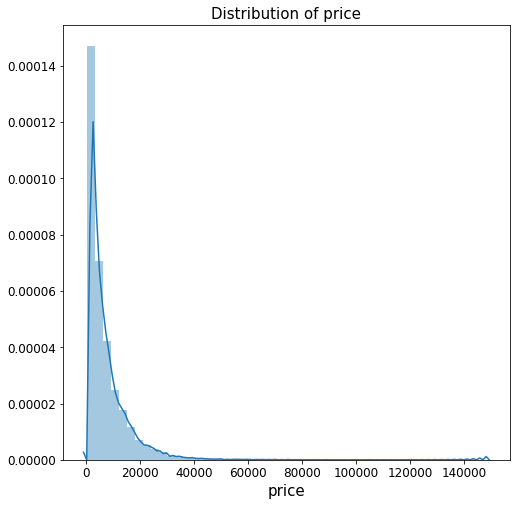

In [19]:
# distribution of price
plt.subplots(figsize=(8, 8))
plt.title('Distribution of price', fontsize=15)
plt.xlabel('$price$', fontsize=15, color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.distplot(df_clean['price'])

We use kernel density estimation to show the distribution of the price.From the histogram of the distribution of price, we could see that most used autos are below $20000,which is quite close to our real life.

3.1.2 distribution of vehicletype

In [20]:
# len(list(test.groupby('x1').size().keys())) shows number of different vehicletype.
test = pd.DataFrame({'y': df_clean['price'], 'x1': df_clean['vehicleType']})
test.groupby('x1').size()


x1
andere         1398
bus           20027
cabrio        14794
coupe         11201
kleinwagen    40822
kombi         43213
limousine     60910
suv            9747
dtype: int64

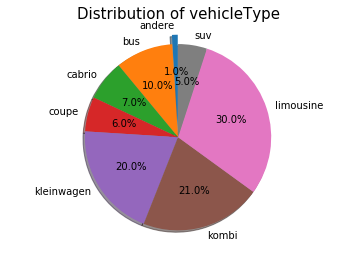

In [21]:
#distribution of vehicletype
test.groupby('x1').size().keys()
presizes = list(test.groupby('x1').size())
total = sum(list(test.groupby('x1').size()))
result = map(lambda x: round(x/total, 2),presizes)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(test.groupby('x1').size().keys())
sizes = list(result)
explode = (0.1, 0, 0, 0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'andere')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of vehicleType', fontsize=15)

plt.show()

There are 8 types of vehicles, to clearly show the distribution of the vehicletype, I choose the pie chart. It makes the ratios of each vehicletype obvious. The pie chart shows that "limousine" has 30% used autos, which is the largest."Andere" has the lowest ratio of the used autos, which is only 1%.

3.1.3 distribution of yearOfRegistration

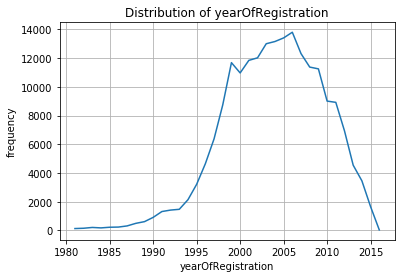

In [22]:
# Data for plotting for yearOfRegistration
# list(df_clean['yearOfRegistration'])
df_ps = pd.DataFrame({'y': df_clean['price'], 'x1': df_clean['yearOfRegistration']})
#df_ps.groupby('x1').mean()
t = list(df_ps.groupby('x1').size().keys())
s = list(df_ps.groupby('x1').size())

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='yearOfRegistration', ylabel='frequency',
       title='Distribution of yearOfRegistration')
ax.grid()

fig.savefig("test.png")
plt.show()
#df_ps.groupby('x1').size()
#df_ps.groupby('x1').size().keys()

From the distribution of yearOfRegistration, most used autos are registered between year 2000 and 2008.

3.1.4 distribution of powerPS

In [23]:
# list(df_clean['powerPS']) 
#df_ps = pd.DataFrame({'y': df_clean['price'], 'x1': df_clean['powerPS']})
#df_ps.groupby('x1').mean()

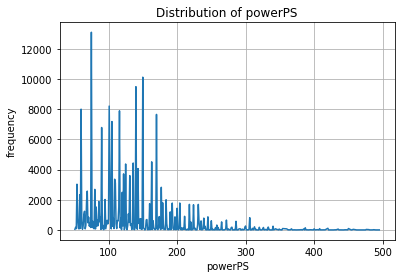

In [24]:
# Data for plotting distribution of powerPS
df_ps1 = pd.DataFrame({'y': df_clean['price'], 'x1': df_clean['powerPS']})
t = list(df_ps1.groupby('x1').size().keys())
s = list(df_ps1.groupby('x1').size())

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='powerPS', ylabel='frequency',
       title='Distribution of powerPS')
ax.grid()

fig.savefig("test.png")
plt.show()
#df_ps1.groupby('x1').size()
#df_ps1.groupby('x1').size().keys()

The distribution of powerPS shows that most used autos are around 60 powerPS.The plot of the distribution of powerPS is right-skewed.There is no linear relationship between the frequency and powerPS.There are almost no autos after 300 powerPS.

3.1.5 distribution of brand

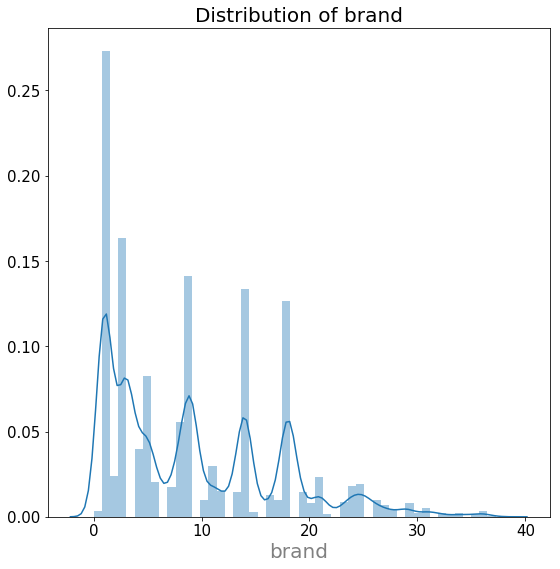

In [25]:
# distribution of brand
plt.subplots(figsize=(9, 9))
plt.title('Distribution of brand', fontsize=20)
plt.xlabel('$brand$', fontsize=20, color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.distplot(ddc['brand'])

In [26]:
#show the number and corresponding brand
brand1

{'jeep': 0,
 'volkswagen': 1,
 'skoda': 2,
 'bmw': 3,
 'peugeot': 4,
 'ford': 5,
 'mazda': 6,
 'nissan': 7,
 'renault': 8,
 'mercedes_benz': 9,
 'honda': 10,
 'fiat': 11,
 'mini': 12,
 'smart': 13,
 'audi': 14,
 'subaru': 15,
 'volvo': 16,
 'mitsubishi': 17,
 'opel': 18,
 'hyundai': 19,
 'alfa_romeo': 20,
 'seat': 21,
 'lancia': 22,
 'porsche': 23,
 'citroen': 24,
 'toyota': 25,
 'kia': 26,
 'chevrolet': 27,
 'dacia': 28,
 'suzuki': 29,
 'daihatsu': 30,
 'chrysler': 31,
 'jaguar': 32,
 'rover': 33,
 'saab': 34,
 'daewoo': 35,
 'land_rover': 36,
 'lada': 37,
 'trabant': 38}

In [27]:
#show the amount of each brand
test1 = pd.DataFrame({'x1': df_clean['brand']})
presizes = list(test1.groupby('x1').size())
total = sum(list(test1.groupby('x1').size()))
result = lambda x: round(x/total, 2),presizes
result

(<function __main__.<lambda>(x)>,
 [1262,
  20510,
  25101,
  1024,
  765,
  2786,
  588,
  217,
  322,
  4595,
  12702,
  1524,
  2264,
  365,
  497,
  1523,
  95,
  227,
  502,
  3151,
  21685,
  2310,
  1555,
  2720,
  19416,
  6062,
  1314,
  8533,
  191,
  306,
  3592,
  3649,
  2213,
  417,
  1259,
  2925,
  2,
  41957,
  1986])

From the histogram of distribution of brand and corresponding exact amount, it is clear that volkswagen are most popular.Other least popular brands are:peugeot,mazda,honda,subaru,hyundai.

3.2 relationship visualization

3.2.1 price vs year

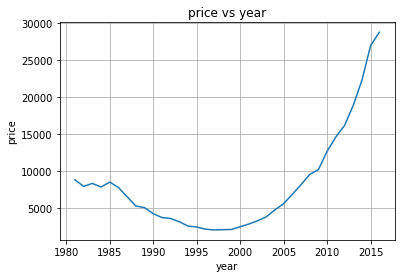

In [28]:
df_ps1 = pd.DataFrame({'y': df_clean['price'], 'x1': df_clean['yearOfRegistration']})
df_ps1.groupby('x1').mean()
#Data for plotting
t = list(df_ps1.groupby('x1').size().keys())
s = list(df_ps1.groupby('x1').mean()['y'])
fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='year', ylabel='price',
       title='price vs year')
ax.grid()
plt.show()

It is clear that from year 1981 to 1997, the price goes down when time goes by. After year 1997,it shows a monotone increasing relationship between price and year.

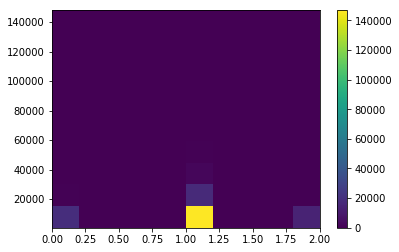

In [58]:
#Two-Dimensional Distributions

plt.hist2d(y=df_clean.price, x=ddc.notRepairedDamage)
plt.colorbar()
plt.show()

In [33]:
nrd1

{'not declare': 0, 'nein': 1, 'ja': 2}

'Nein' means true which shows that if the used autos had no repaired damage, their price would be higher.

3.2.3 price vs kilometers

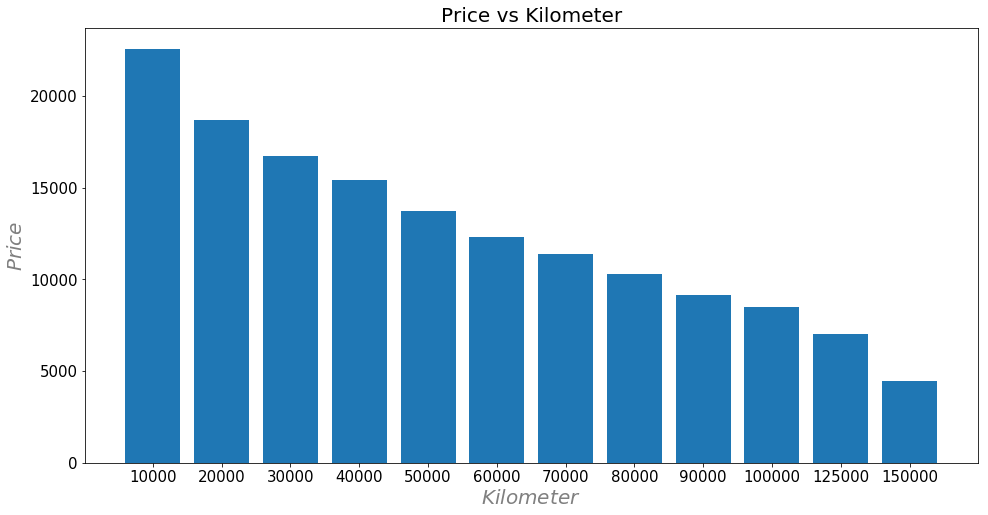

In [35]:
df_groupby_kilometer = df_clean.groupby(by=['kilometer'])['price'].mean().sort_values(ascending=False)
r = range(len(df_clean['kilometer'].unique()))

plt.figure(figsize=(16, 8))
plt.bar(r, df_groupby_kilometer)
plt.yticks(fontsize=15)
plt.xticks(r, df_groupby_kilometer.index, fontsize=15)
plt.title('Price vs Kilometer', fontsize=20)
plt.xlabel('$Kilometer$', fontsize=20, color='gray')
plt.ylabel('$Price$', fontsize=20, color='gray')
plt.show()

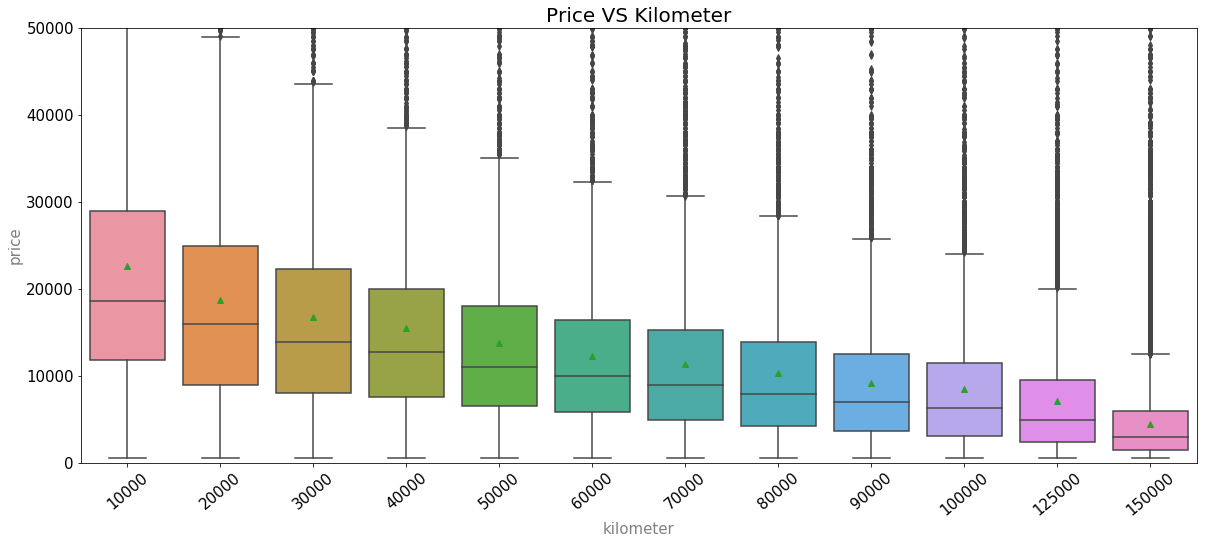

In [36]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 50000))
plt.title('Price VS Kilometer', fontsize=20)
plt.xlabel('$kilometer$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.boxplot(x='kilometer', y='price', data=df_clean, sym='r*', meanline=False, showmeans=True)


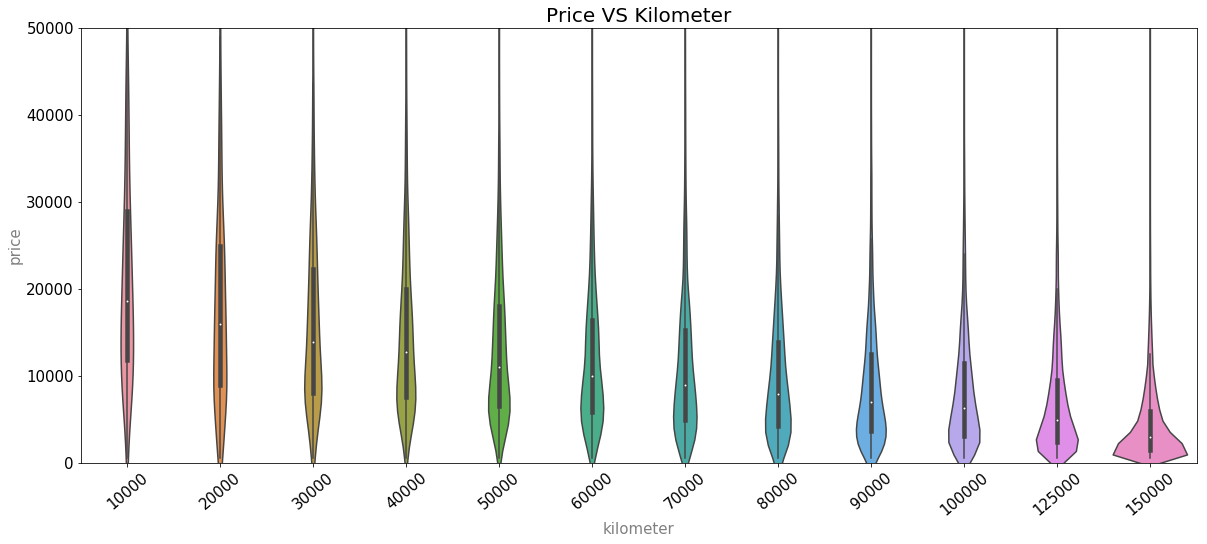

In [37]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 50000))
plt.title('Price VS Kilometer', fontsize=20)
plt.xlabel('$kilometer$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.violinplot(x='kilometer', y='price', data=df_clean, sym='r*', meanline=False, showmeans=True)

It is obvious that kilometer is less, the price is cheaper.

3.2.4 price vs brand

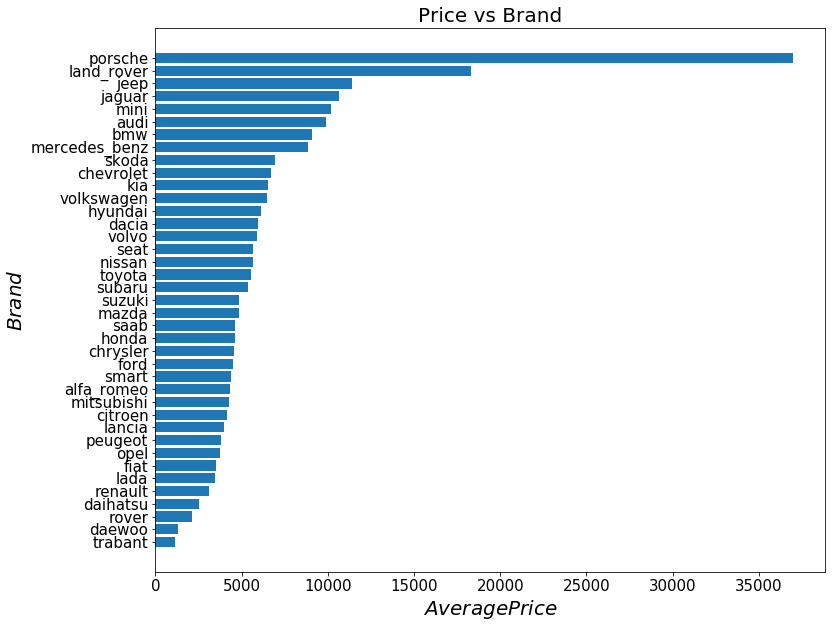

In [50]:
df_groupby_brand = df_clean.groupby(by=['brand'])['price'].mean().sort_values()
a = df_clean['brand'].unique()
r = range(len(a))

plt.figure(figsize=(12,10))
plt.barh(r, df_groupby_brand)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_brand.index, fontsize=15)
plt.title('Price vs Brand', fontsize=20)
plt.xlabel('$Average Price$', fontsize=20, color='black')
plt.ylabel('$Brand$', fontsize=20, color='black')
plt.show()

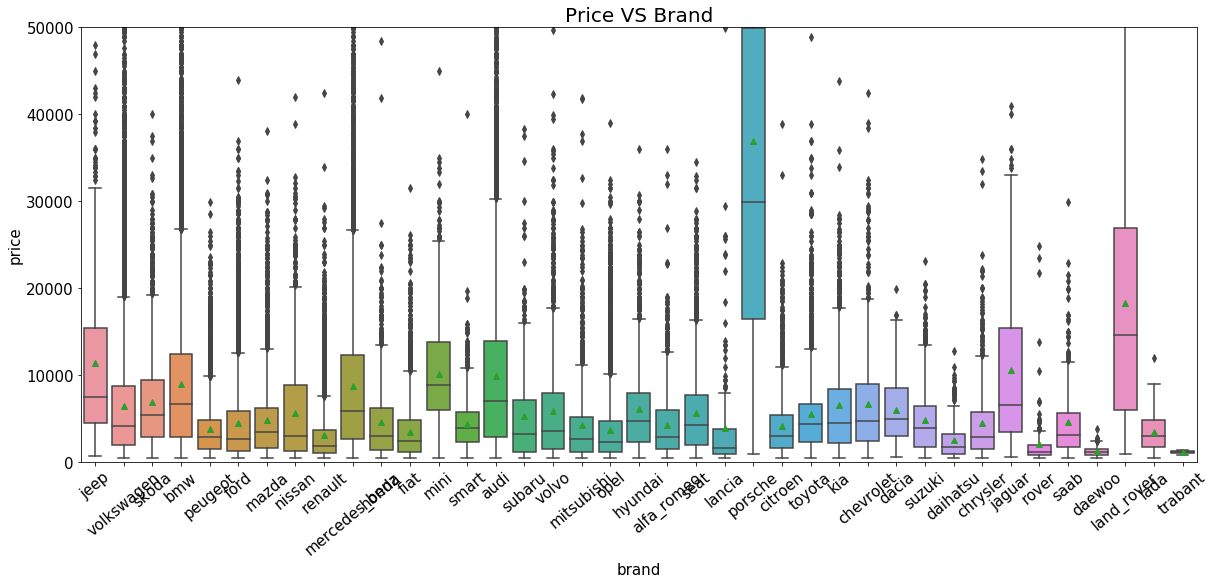

In [51]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 50000))
plt.title('Price VS Brand', fontsize=20)
plt.xlabel('$Brand$', fontsize=15, color='black')
plt.ylabel('$Price$', fontsize=15, color='black')
sns.boxplot(x='brand', y='price', data=df_clean, sym='r*', meanline=False, showmeans=True)


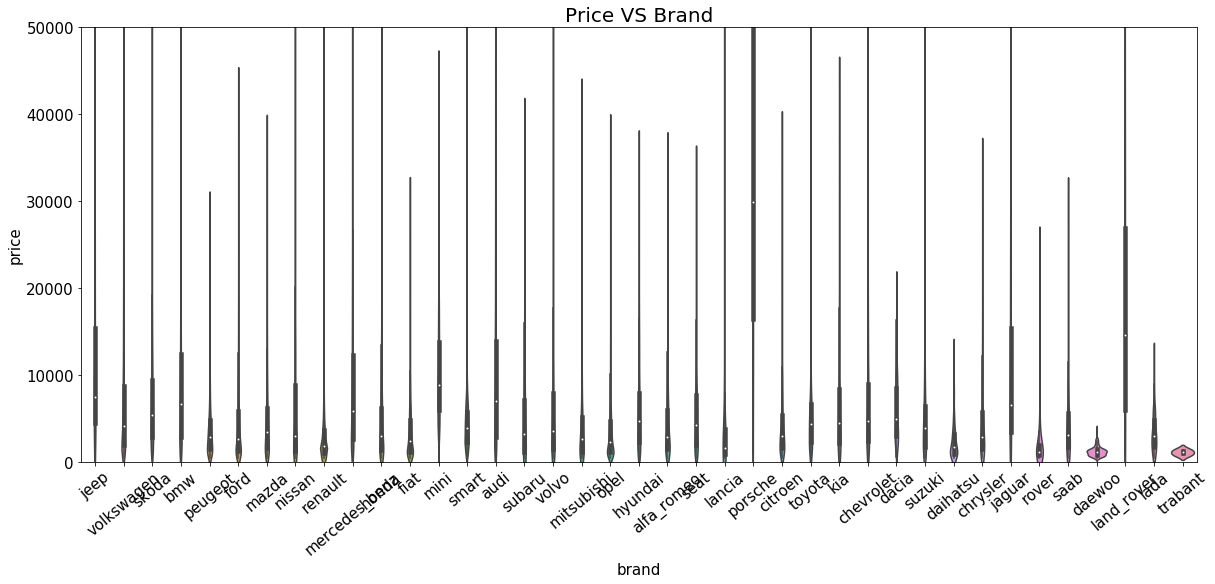

In [52]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 50000))
plt.title('Price VS Brand', fontsize=20)
plt.xlabel('$Brand$', fontsize=15, color='black')
plt.ylabel('$Price$', fontsize=15, color='black')
sns.violinplot(x='brand', y='price', data=df_clean, sym='r*', meanline=False, showmeans=True)


We can see that the brand porsche is the most expensive with average $35000, and the brand land_rover is the second most expensive with average $20000. The brand trabant is cheapest which is only less than $2000. Most used autos are around $10000.

3.2.5 price vs vehicleType

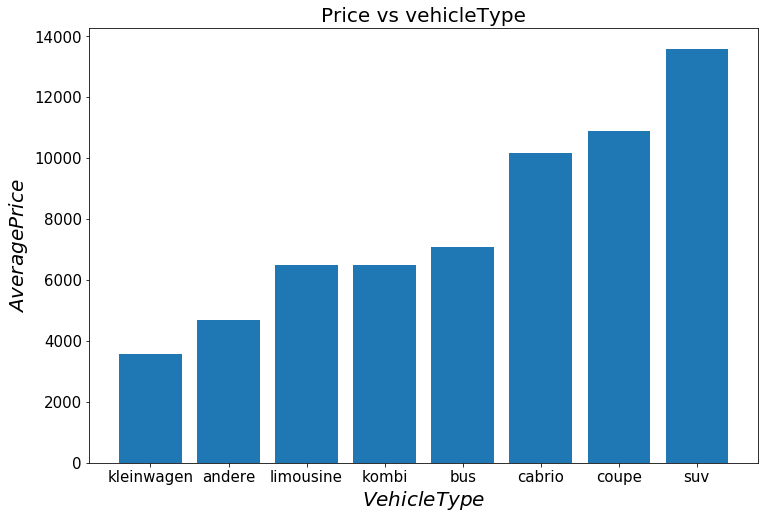

In [53]:
df_groupby_vehicleType = df_clean.groupby(by=['vehicleType'])['price'].mean().sort_values()
r = range(len(df_clean['vehicleType'].unique()))
plt.figure(figsize=(12, 8))
plt.bar(r, df_groupby_vehicleType)
plt.yticks(fontsize=15)
plt.xticks(r, df_groupby_vehicleType.index, fontsize=15)
plt.title('Price vs vehicleType', fontsize=20)
plt.ylabel('$Average Price$', fontsize=20, color='black')
plt.xlabel('$VehicleType$', fontsize=20, color='black')
plt.show()

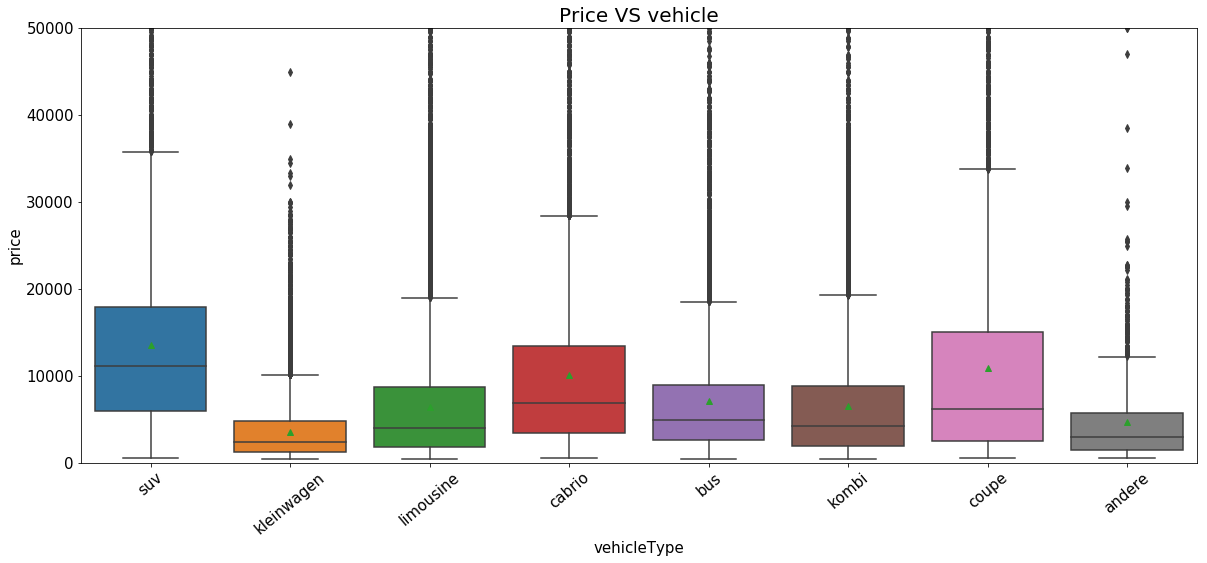

In [43]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 50000))
plt.title('Price VS vehicle', fontsize=20)
plt.xlabel('$vehicletype$', fontsize=15, color='black')
plt.ylabel('$Price$', fontsize=15, color='black')
sns.boxplot(x='vehicleType', y='price', data=df_clean, sym='r*', meanline=False, showmeans=True)

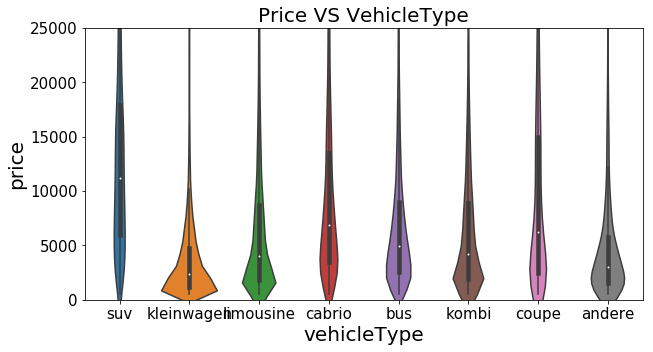

In [44]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0, 25000))
plt.title('Price VS VehicleType', fontsize=20)
plt.xlabel('$VehicleType$', fontsize=20, color='black')
plt.ylabel('$Price$', fontsize=20, color='black')
sns.violinplot(x='vehicleType', y='price', data=df_clean, sym='r*', meanline=False, showmeans=True)

From the relationship from price and vehicletype, the SUV are most expensive and kleinwagen is the cheapest but they are not popular cars. The limousine one is the third expensive ones and in active demand.This vehicle type is highly cost effective.

3.2.6 price vs gearbox

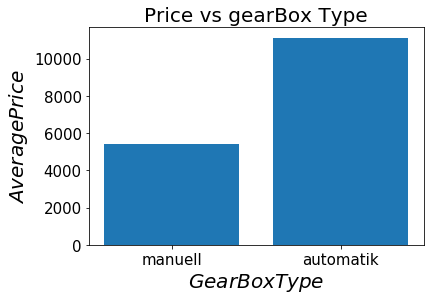

In [54]:
df_groupby_gearbox = df_clean.groupby(by=['gearbox'])['price'].mean().sort_values()
r = range(len(df_clean['gearbox'].unique()))

plt.figure(figsize=(6, 4))
plt.bar(r, df_groupby_gearbox)
plt.yticks(fontsize=15)
plt.xticks(r, df_groupby_gearbox.index, fontsize=15)
plt.title('Price vs gearBox Type', fontsize=20)
plt.ylabel('$Average Price$', fontsize=20, color='black')
plt.xlabel('$GearBox Type$', fontsize=20, color='black')
plt.show()

According to the plot, the price of the automatik ones are higher than the manuell ones because manuell ones are much more fuel efficent.There were enough of them being sold and driven that selling and re-sale value were not a problem for the manuell ones.

3.2.7 price vs fueltype

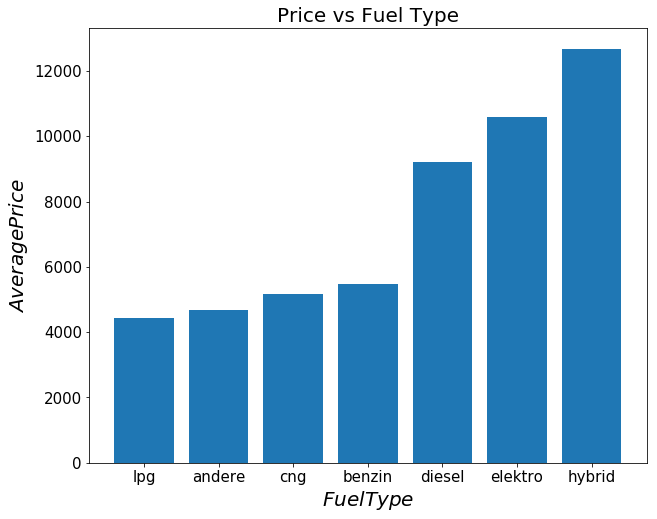

In [55]:
df_groupby_fuelType = df_clean.groupby(by=['fuelType'])['price'].mean().sort_values()
r = range(len(df_clean['fuelType'].unique()))

plt.figure(figsize=(10, 8))
plt.bar(r, df_groupby_fuelType)
plt.yticks(fontsize=15)
plt.xticks(r, df_groupby_fuelType.index, fontsize=15)
plt.title('Price vs Fuel Type', fontsize=20)
plt.ylabel('$Average Price$', fontsize=20, color='black')
plt.xlabel('$Fuel Type$', fontsize=20, color='black')
plt.show()

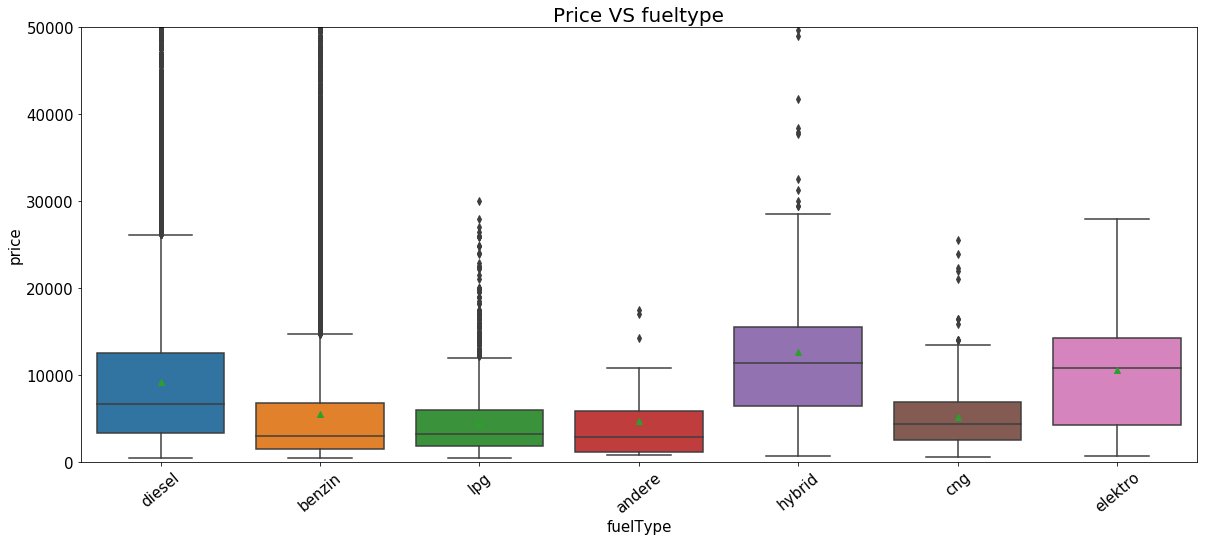

In [47]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 50000))
plt.title('Price VS fueltype', fontsize=20)
plt.xlabel('$fueltype$', fontsize=15, color='black')
plt.ylabel('$Price$', fontsize=15, color='black')
sns.boxplot(x='fuelType', y='price', data=df_clean, sym='r*', meanline=False, showmeans=True)

It seems that the hybrid ones are most expensive because of advanced technology which is within hybrids, they may cost an extra dozen or $2000 or more over the conventional gasoline powered equivalent ones

3.2.9 scatterplot matrix

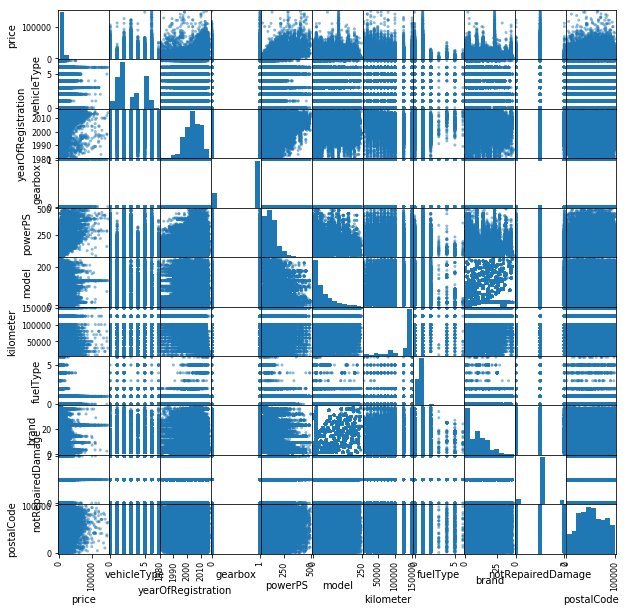

In [56]:
from pandas.plotting import scatter_matrix

vars_to_use = ['price','vehicleType' ,'yearOfRegistration','gearbox','powerPS','model','kilometer','fuelType','brand',
               'notRepairedDamage','postalCode'] # pick vars
# NOT A GOOD PLOT, it needs jitter to make the categorical attributes better visualized
ax = scatter_matrix(ddc[vars_to_use],figsize=(10, 10))

# also we need some type of subset selection, this is just too much data

The matrix of scatterplot is shown above. It describes all the relationships among 11 attributes. But from the scatterplot, it is hard to describe the relationship so we try to use the correlation matrix. 

3.2.8 correlation matrix

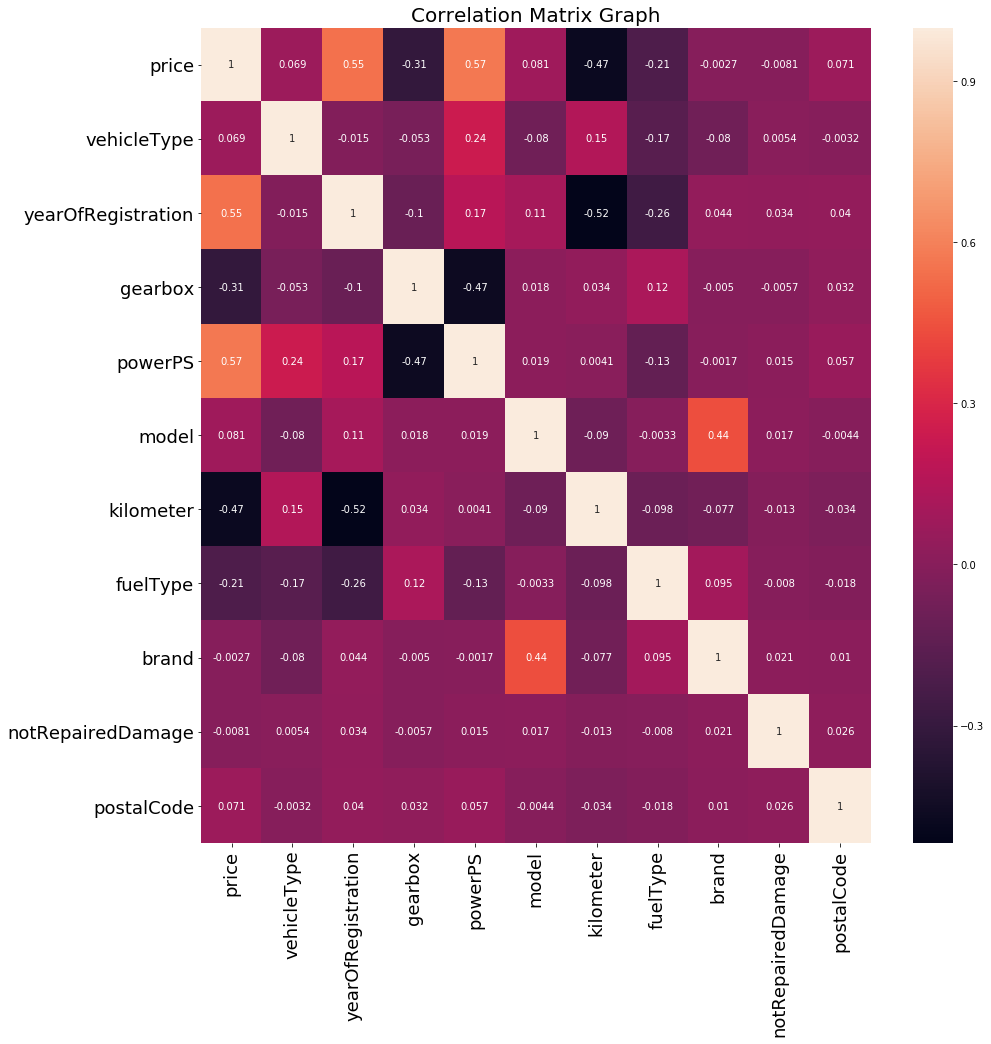

In [49]:
# plot the correlation matrix 
vars_to_use = ['price','vehicleType' ,'yearOfRegistration','gearbox','powerPS','model','kilometer','fuelType','brand',
               'notRepairedDamage','postalCode']# pick vars


# fill in the indices

dc = ddc[vars_to_use].corr()
plt.subplots(figsize=(15, 15))
plt.title('Correlation Matrix Graph', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sns.heatmap(dc,annot=True)

The matrix graph shows the relationship between the 11 variables. 
(1)Price is dependent on the yearOfRegistration, gearbox, powerPS,kilometer and fueltype.
(2)Price is highly correlated with yearOfRegistration, powerPS and kilometer.
(3)The feature if it has repaired damage does not significantly affect the price.
(4)The model and the brand has high correlation, which makes sense. They will be made in the same corporation.
(5)The year has negative correlation with the kilometer, which means you purchased it earlier, you would drive more kilometers.